#### 合成数据函数 synthetic_data

In [27]:
import torch

def synthetic_data(w, b, num_examples, std=0.01):
    """
    根据权重 w 和 偏置b 合成数据
    生成 num_examples 个数据样本
    """
    X = torch.normal(0, 1, (num_examples, len(w)), dtype=torch.float32)
    y = torch.matmul(X, w) + b
    # 再给 y 增加点噪音
    y += torch.normal(0, std, y.shape)
    return X, y.reshape(-1, 1)

#### 线性数据的权重 和 偏置项

In [28]:
true_w = torch.tensor([3], dtype=torch.float32)
true_b = torch.tensor([2], dtype=torch.float32)
true_w, true_b

(tensor([3.]), tensor([2.]))

#### 创建数据集

In [29]:
X, y = synthetic_data(true_w, true_b, 300, 1)

#### 绘制数据集

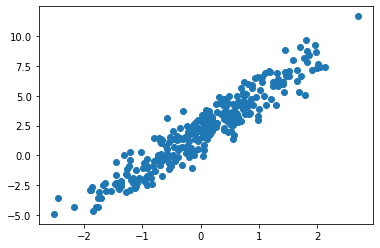

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X.numpy().reshape(-1), y.numpy().reshape(-1))
plt.show()

#### 定义模型

In [31]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, X):
        return self.linear(X)

#### 设置训练参数

In [32]:
epochs = 20
batch_size = 50
lr = 0.1

#### 创建数据迭代器

In [33]:
from torch.utils import data

def load_data_iter(X, y, batch_size):
    dataset = data.TensorDataset(X, y)
    return data.DataLoader(dataset, batch_size=batch_size)

In [34]:
data_iter = load_data_iter(X, y, batch_size)

#### 创建模型

In [35]:
net = Net()

#### 定义优化器

In [36]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)

#### 定义损失函数

In [37]:
loss = torch.nn.MSELoss()

#### 模型训练

当前是第 1 轮训练；损失为 1.8778871297836304
当前是第 2 轮训练；损失为 1.04072105884552
当前是第 3 轮训练；损失为 0.9784902930259705
当前是第 4 轮训练；损失为 0.9733763337135315
当前是第 5 轮训练；损失为 0.9728626608848572
当前是第 6 轮训练；损失为 0.9727951884269714
当前是第 7 轮训练；损失为 0.9727843999862671
当前是第 8 轮训练；损失为 0.9727826118469238
当前是第 9 轮训练；损失为 0.9727823734283447
当前是第 10 轮训练；损失为 0.9727823138237
当前是第 11 轮训练；损失为 0.9727823734283447
当前是第 12 轮训练；损失为 0.9727824926376343
当前是第 13 轮训练；损失为 0.9727823734283447
当前是第 14 轮训练；损失为 0.9727823734283447
当前是第 15 轮训练；损失为 0.9727823734283447
当前是第 16 轮训练；损失为 0.9727823734283447
当前是第 17 轮训练；损失为 0.9727823734283447
当前是第 18 轮训练；损失为 0.9727823734283447
当前是第 19 轮训练；损失为 0.9727823734283447
当前是第 20 轮训练；损失为 0.9727823734283447


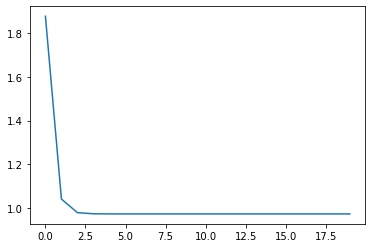

In [38]:
all_loss = []

for epoch in range(epochs):
    for _X, _y in data_iter:
        l = loss(_y, net.forward(_X))
        trainer.zero_grad()
        l.backward()
        trainer.step()
        
    l = loss(y, net.forward(X))
    all_loss.append(l) 
    print(f'当前是第 {epoch+1} 轮训练；损失为 {l}')

plt.plot([i for i in range(len(all_loss))], all_loss)

In [39]:
net.linear.weight.data, net.linear.bias.data

(tensor([[3.0770]]), tensor([1.9974]))